In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib
import os

# In[50]:

from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
gpus = tf.config.list_physical_devices("GPU")[0]
tf.config.experimental.set_memory_growth(gpus, True)
tf.config.experimental.set_virtual_device_configuration(
        gpus,
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3072)])

In [6]:
cat_dog_path_train = "./cats_and_dogs_filtered/train/"
cat_dog_path_validation = "./cats_and_dogs_filtered/validation/"

In [7]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=cat_dog_path_train,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=cat_dog_path_validation,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
model = models.Sequential([
   
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0

In [12]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=1000 // batch_size,
    epochs=100,
    validation_data=val_data_gen,
    validation_steps=100 // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 7 steps, validate for 8 steps
Epoch 1/100
7/7 [==============================] - 4s 581ms/step - loss: 1.4148 - accuracy: 0.4847 - val_loss: 0.7075 - val_accuracy: 0.5000
Epoch 2/100
7/7 [==============================] - 3s 432ms/step - loss: 0.7183 - accuracy: 0.4978 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 3/100
7/7 [==============================] - 3s 436ms/step - loss: 0.6928 - accuracy: 0.5224 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 4/100
7/7 [==============================] - 3s 452ms/step - loss: 0.6916 - accuracy: 0.4922 - val_loss: 0.6900 - val_accuracy: 0.5000
Epoch 5/100
7/7 [==============================] - 3s 447ms/step - loss: 0.6946 - accuracy: 0.5301 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 6/100
7/7 [==============================] - 3s 441ms/step - loss: 0.6915 - accuracy: 0.4911 - val_loss: 0.6917 - val_accur

In [41]:
model.evaluate(validation_image_generator, batch_size=100, steps=10)

ValueError: Failed to find data adapter that can handle input: <class 'tensorflow.python.keras.preprocessing.image.ImageDataGenerator'>, <class 'NoneType'>

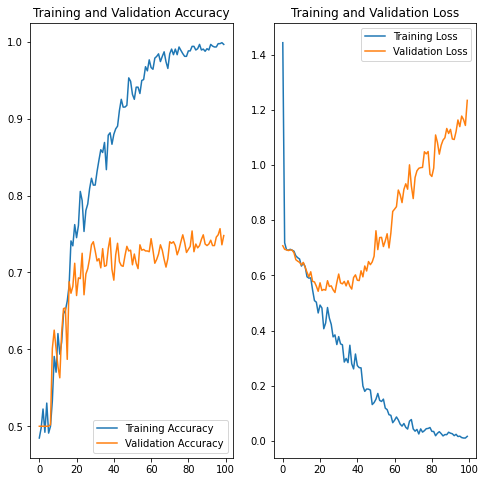

In [15]:
import matplotlib.pyplot as plt
# print(model.history.history)
# acc = model.history.history['accuracy']

# loss = model.history.history['loss']
# val_loss  = model.history.history["val_loss"]

# epochs_range = range(100)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='val_loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
tf.keras.models.save_model(model,"/tmp/mobilenet/9/1")


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /tmp/mobilenet/9/1/assets


In [22]:
prediction_img = './cats_and_dogs_filtered/train/cats/cat.121.jpg'
test_img = tf.io.read_file(traing_image_path[100])
test_img = tf.image.decode_image(test_img, channels=3)
test_image = tf.image.convert_image_dtype(test_img, dtype=tf.float32).numpy()
predict_data  = np.resize(test_image, [1,150,150,3]).tolist()
predict_data

[[[[0.6274510025978088, 0.6431372761726379, 0.6549019813537598],
   [0.6274510025978088, 0.6431372761726379, 0.6470588445663452],
   [0.6313725709915161, 0.6470588445663452, 0.6509804129600525],
   [0.6313725709915161, 0.6509804129600525, 0.6352941393852234],
   [0.6274510025978088, 0.6470588445663452, 0.6196078658103943],
   [0.6235294342041016, 0.6470588445663452, 0.6000000238418579],
   [0.6196078658103943, 0.6431372761726379, 0.5882353186607361],
   [0.615686297416687, 0.6431372761726379, 0.5803921818733215],
   [0.6549019813537598, 0.6784313917160034, 0.6235294342041016],
   [0.6313725709915161, 0.6549019813537598, 0.6078431606292725],
   [0.615686297416687, 0.6392157077789307, 0.6000000238418579],
   [0.615686297416687, 0.6352941393852234, 0.6117647290229797],
   [0.6039215922355652, 0.6196078658103943, 0.6235294342041016],
   [0.5803921818733215, 0.5921568870544434, 0.6117647290229797],
   [0.572549045085907, 0.5843137502670288, 0.6117647290229797],
   [0.5764706134796143, 0.592

In [73]:
model.predict(predict_data)

array([[-4.3994865]], dtype=float32)

In [79]:
a= {'friendBTName': '["48:3F:E9:8A:32:E4","D6:1C:9B:0E:9E:7B","C9:30:7C:D2:D3:D5","4B:FE:FD:5E:F1:3A","49:27:B0:60:83:0C","DA:AB:A6:5A:37:17","C5:FD:5F:26:27:37","58:80:3C:4A:16:D5","D1:BC:04:68:7E:DF","0C:EC:84:00:A5:FA","D5:13:D3:72:19:4A","E6:8A:66:D0:8E:65","80:35:C1:27:7B:E6","D7:9E:42:FD:D5:B7","FC:A8:A9:BA:03:0A","FD:F5:4D:D2:70:C3","18:56:80:05:3F:47","F2:D6:BB:92:13:A4","F3:9B:AB:63:F7:F3","0E:79:1E:BC:62:61","94:87:E0:A3:5B:33","C2:94:39:3E:60:53","A4:50:46:78:96:84","20:19:15:33:48:00","40:45:DA:B1:B4:4B","F4:D6:20:03:BD:CC","EF:94:2A:AB:27:FA","CB:CD:58:F3:FA:CE","F8:F4:7B:9A:F4:23","EB:79:A8:A9:C3:58","7B:F3:53:45:62:61","3E:EF:83:C6:62:61","45:51:75:A5:62:60"]', 'imei': '867400020316612', 'myBTName': 'Bluedroid'}

import json
json.dumps(a)

'{"friendBTName": "[\\"48:3F:E9:8A:32:E4\\",\\"D6:1C:9B:0E:9E:7B\\",\\"C9:30:7C:D2:D3:D5\\",\\"4B:FE:FD:5E:F1:3A\\",\\"49:27:B0:60:83:0C\\",\\"DA:AB:A6:5A:37:17\\",\\"C5:FD:5F:26:27:37\\",\\"58:80:3C:4A:16:D5\\",\\"D1:BC:04:68:7E:DF\\",\\"0C:EC:84:00:A5:FA\\",\\"D5:13:D3:72:19:4A\\",\\"E6:8A:66:D0:8E:65\\",\\"80:35:C1:27:7B:E6\\",\\"D7:9E:42:FD:D5:B7\\",\\"FC:A8:A9:BA:03:0A\\",\\"FD:F5:4D:D2:70:C3\\",\\"18:56:80:05:3F:47\\",\\"F2:D6:BB:92:13:A4\\",\\"F3:9B:AB:63:F7:F3\\",\\"0E:79:1E:BC:62:61\\",\\"94:87:E0:A3:5B:33\\",\\"C2:94:39:3E:60:53\\",\\"A4:50:46:78:96:84\\",\\"20:19:15:33:48:00\\",\\"40:45:DA:B1:B4:4B\\",\\"F4:D6:20:03:BD:CC\\",\\"EF:94:2A:AB:27:FA\\",\\"CB:CD:58:F3:FA:CE\\",\\"F8:F4:7B:9A:F4:23\\",\\"EB:79:A8:A9:C3:58\\",\\"7B:F3:53:45:62:61\\",\\"3E:EF:83:C6:62:61\\",\\"45:51:75:A5:62:60\\"]", "imei": "867400020316612", "myBTName": "Bluedroid"}'

In [72]:
import json
import numpy
import requests



data = json.dumps({"signature_name": "serving_default",
                   "instances":predict_data,"inputs":predict_data})

headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/mobilenet1:predict',
                              data=data, headers=headers)
print(json_response.text)
# predictions = numpy.array(json.loads(json_response.text)["predictions"])
# predictions[0]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

